<a href="https://colab.research.google.com/github/yxrellx/practicaredNeuronal/blob/main/Kfolds_Reconocimiento_de_imagenes_Red_Neuronal_Multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Carga de librerias
from PIL import Image
import os
import numpy as np
from keras.models import load_model

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/Superheroes2'

# Lista para almacenar las imágenes cargadas
image_list = []
#Lista para almacenar las etiquetas
y = []
# Cargar el modelo
modelo = load_model('/content/drive/MyDrive/Superheroes2/modelo.h5')
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'batman' in filename:
      y.append(0) #indice 0 batman
    elif 'ironman' in filename: #indice 1 ironman
      y.append(1)
    elif 'linternaverde' in filename: #indice 2 linternaverde
      y.append(2)
    elif 'spiderman' in filename: #indice 3 spiderman
      y.append(3)
    elif 'wolwerine' in filename: #indice 4 wolwerine
      y.append(4)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)


# Ahora 'image_list_train' contiene todas las imágenes cargadas


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_list, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
#Carga de librerias
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
def crear_modelo():
  #keras.utils.set_random_seed(20)#812
  #Se establece un modelo neuronal
  model = Sequential()
  model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(5, activation='softmax')) #3 es el numero de clases
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [10]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes=5)
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [13]:
X_train.shape

(80, 224, 224, 3)

In [14]:
#Verificamos el cambio
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0.

In [15]:
type(y_train)

numpy.ndarray

In [16]:
y_train.shape

(80, 5)

In [17]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
# Configurar la validación cruzada con K-Fold


checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = crear_modelo()

    # Entrenar el modelo
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold), callbacks=[checkpoint])

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(accuracy)

    print(f"Fold {fold_no} - Accuracy: {accuracy:.4f}")
    fold_no += 1

# Evaluar el modelo en el conjunto de prueba
#test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
#print(f"Test Accuracy: {test_accuracy:.4f}")

print(f"Mean Cross-Validation Accuracy: {np.mean(accuracies):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Accuracy: 0.1875
Fold 2 - Accuracy: 0.3750
Fold 3 - Accuracy: 0.1250
Fold 4 - Accuracy: 0.3125
Fold 5 - Accuracy: 0.3750
Mean Cross-Validation Accuracy: 0.2750


In [18]:
#Cambiamos el formato al conjunto de prueba
X_test = np.array(X_test)
y_test = np.array(y_test)

In [19]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [20]:
print(y_test.shape)
print(X_test.shape)

(20,)
(20, 224, 224, 3)


In [21]:
#Verificamos su forma
y_test

array([2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2])

In [22]:
model.load_weights('best_model.keras')

In [23]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) #Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [24]:
#Revisamos el resultado
y_pred

array([[1.3170347e-01, 2.1112624e-04, 8.6710191e-01, 1.6717283e-06,
        9.8187546e-04],
       [2.9584048e-03, 9.3672591e-01, 9.7384609e-06, 5.8634326e-02,
        1.6716009e-03],
       [4.8932564e-01, 5.9506751e-04, 6.4442543e-06, 4.1563475e-01,
        9.4438210e-02],
       [1.7039180e-02, 1.9233774e-01, 4.6330005e-08, 8.3026653e-03,
        7.8232026e-01],
       [5.2712715e-01, 4.6759656e-01, 7.4923836e-04, 4.3177535e-03,
        2.0930318e-04],
       [1.1988792e-01, 8.0327713e-01, 7.0996560e-02, 4.0216981e-03,
        1.8166056e-03],
       [1.0277127e-01, 7.2526876e-07, 8.9612669e-01, 4.1233652e-06,
        1.0970796e-03],
       [9.0651405e-01, 3.8599421e-04, 4.2730042e-09, 9.1191389e-02,
        1.9084269e-03],
       [4.3070133e-04, 6.1525252e-06, 9.8783952e-01, 3.3473635e-10,
        1.1723570e-02],
       [3.7044272e-04, 9.6477383e-01, 1.1439195e-08, 3.4854047e-02,
        1.7226248e-06],
       [3.4368098e-02, 8.9309102e-01, 1.7630242e-06, 7.1931906e-02,
        6.07

In [25]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [26]:
#Se importan las librerias

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print("Exactitud:", accuracy)
print("Precisión por clase:", precision,'->', precision_avg)
print("Sensibilidad por clase:", recall,'->', recall_avg)
print("F1 Score por clase:", f1,'->', f1_avg)

Exactitud: 0.25
Precisión por clase: [0.         0.14285714 0.66666667 0.         0.        ] -> 0.1619047619047619
Sensibilidad por clase: [0.   0.25 1.   0.   0.  ] -> 0.25
F1 Score por clase: [0.         0.18181818 0.8        0.         0.        ] -> 0.19636363636363638


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


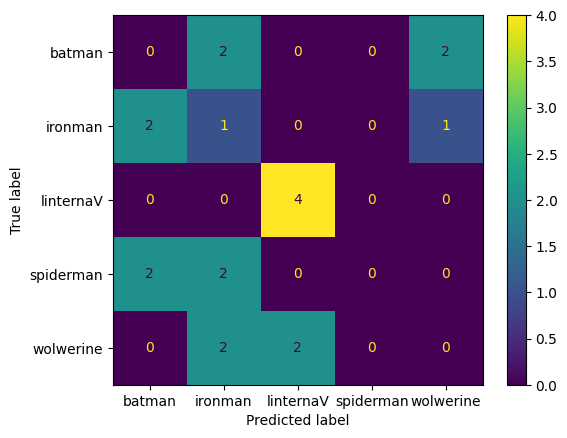

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels =['batman','ironman','linternaV','spiderman','wolwerine']
disp.plot()

In [28]:
y_test

array([2, 0, 3, 1, 1, 4, 2, 1, 4, 0, 3, 0, 3, 3, 4, 2, 4, 0, 1, 2])

In [29]:
y_pred

array([2, 1, 0, 4, 0, 1, 2, 0, 2, 1, 1, 4, 1, 0, 2, 2, 1, 4, 1, 2])

In [30]:
X_test[5]

array([[[0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        ...,
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235]],

       [[0.12941176, 0.11372549, 0.10980392],
        [0.12941176, 0.11372549, 0.10980392],
        [0.12941176, 0.11372549, 0.10980392],
        ...,
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235]],

       [[0.1254902 , 0.10980392, 0.10588235],
        [0.1254902 , 0.10980392, 0.10588235],
        [0.12941176, 0.11372549, 0.10980392],
        ...,
        [0.1254902 , 0.10980392, 0.10588235],
        [0.12156863, 0.10588235, 0.10196078],
        [0.1254902 , 0.10980392, 0.10588235]],

       ...,

       [[0.36078431, 0.30196078, 0.2745098 ],
        [0.35686275, 0.29803922, 0.27058824],
        [0.36470588, 0

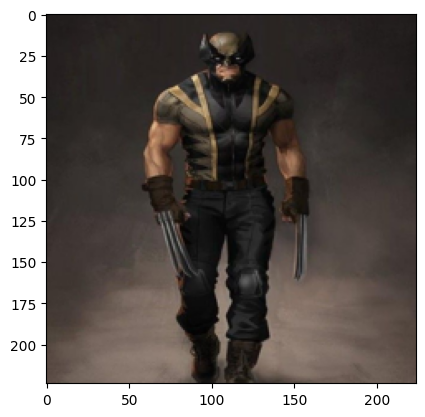

In [31]:
import matplotlib.pyplot as plt
img_array = (X_test[5] * 255).astype(np.uint8)  # Scale to 0-255 and convert to 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)

In [32]:
model.save('modelo_kfold.h5')